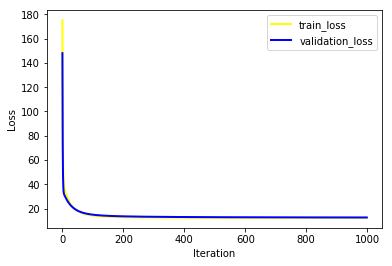

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#读取数据
def get_data():
    data = load_svmlight_file('housing_scale')
    return data[0],data[1]

X, y = get_data()

X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.33,random_state = 42)#数据分割

X_train = X_train.todense()
X_validation = X_validation.todense()

y_train = y_train.reshape(y_train.shape[0],1)
y_validation = y_validation.reshape(y_validation.shape[0],1)

m,n = np.shape(X_train)
w = np.ones((n,1))
learning_rate = 0.0003

def loss_function(x,y,w):
    loss = (1/2 *(np.linalg.norm(x*w-y))**2)/ (x.shape[0])
    return loss

train_loss = []
validation_loss = []

iteration =1000

for i in range(0,iteration):
    gradient = X_train.T * ( X_train * w - y_train) #x(wx-y)
    #print(gradient)
    w = w - learning_rate * gradient
    #print(w)
    train_loss.append(loss_function(X_train,y_train,w))
    validation_loss.append(loss_function(X_validation,y_validation,w))


a = np.arange(0,iteration,1)
plt.plot(a,train_loss,label = "train_loss",color = "yellow",linewidth = 2)
plt.plot(a,validation_loss,label = 'validation_loss',color = 'blue',linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
